In [1]:
from dotenv import dotenv_values
import pandas as pd
import pyodbc
import warnings 

warnings.filterwarnings('ignore')

In [2]:

df_data = pd.read_csv('C:/Users/HP/OneDrive - Azubi Africa/Desktop/Lproject1/data.csv')


In [3]:
df_data.head()

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year,Founded,Founders,Investor
0,TheCollegeFever,"Bangalore, Karnataka, India",E-Commerce,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,Seed,2018,9999,NaN,NaN
1,Happy Cow Dairy,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,40000000.0,Seed,2018,9999,NaN,NaN
2,MyLoanCare,"Gurgaon, Haryana, India",FinTech,Leading Online Loans Marketplace in India,65000000.0,Series A,2018,9999,NaN,NaN
3,PayMe India,"Noida, Uttar Pradesh, India",FinTech,PayMe India is an innovative FinTech organizat...,2000000.0,Angel,2018,9999,NaN,NaN
4,Eunimart,"Hyderabad, Andhra Pradesh, India",E-Commerce,Eunimart is a one stop solution for merchants ...,6000000.0,Seed,2018,9999,NaN,NaN


In [4]:
df_data["Sector"].isnull().sum()

5

In [5]:
df_data[df_data["Sector"].isna()]

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year,Founded,Founders,Investor
566,VMate,NaN,NaN,A short video platform,100000000.0,Undisclosed,2019,9999,NaN,Alibaba
574,Awign Enterprises,Bangalore,NaN,It supplies workforce to the economy,4000000.0,Series A,2019,2016,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea..."
577,TapChief,Bangalore,NaN,It connects individuals in need of advice in a...,1500000.0,Pre series A,2019,2016,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.
581,KredX,Bangalore,NaN,Invoice discounting platform,26000000.0,Series B,2019,9999,Manish Kumar,Tiger Global Management
582,m.Paani,Mumbai,NaN,It digitizes and organises local retailers,5500000.0,Series A,2019,9999,Akanksha Hazari,"AC Ventures, Henkel"


In [6]:
df_data.Sector.fillna('Unspecified', inplace= True)

In [7]:
df_data['Sector'].isna().sum()

0

In [8]:
df_data["Sector"].head()

0              E-Commerce
1    Agriculture, Farming
2                 FinTech
3                 FinTech
4              E-Commerce
Name: Sector, dtype: object

In [9]:
df_data["Stage"].isnull().sum()

0

In [10]:
df_data["Amount"].isnull().sum()

0

In [11]:
df_data.loc[[645, 661, 730, 770], ['Sector', 'What_it_does']] # we assume food and foodtech are same industry.

,Sector,What_it_does
645,Logistics,Pickrr is an on-demand first mile logistics co...
661,EdTech,Tinker Coder is a LIVE Online Platform through...
730,EdTech,Unacademy is an online learning platform provi...
770,AgriTech,MoooFarm is an information technology company ...


In [12]:
df_data.groupby(['Sector', 'Stage'])["Amount"].sum().sort_values(ascending=False)[:10]

Sector      Stage          
FinTech     Debt               1.501769e+11
Retail      Undisclosed        7.016825e+10
Aerospace   Private Equity     2.000000e+10
FinTech     Post-Ipo Equity    1.539200e+10
            Series E           6.014453e+09
            Series B           5.953820e+09
E-Commerce  Series B           3.313200e+09
Tech        Undisclosed        3.179556e+09
EdTech      Undisclosed        3.002208e+09
FinTech     Seed               2.911059e+09
Name: Amount, dtype: float64

In [13]:
from scipy import stats

# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(df_data['Amount'])

# Print the results
print("Shapiro-Wilk Test")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Check the result against the significance level (0.05)
alpha = 0.05
if p_value > alpha:
    print("The data is normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")

Shapiro-Wilk Test
Test Statistic: 0.015618681907653809
p-value: 0.0
The data is not normally distributed (reject H0)


In [14]:
from scipy.stats import f_oneway

# Encoding categorical values into numerical labels
category_labels, category_levels = pd.factorize(df_data['Sector'])

# Performing ANOVA test
result = f_oneway(df_data['Amount'][category_labels == 0],
                  df_data['Amount'][category_labels == 1],
                  df_data['Amount'][category_labels == 2],
                  df_data['Amount'][category_labels == 3],
                  df_data['Amount'][category_labels == 4],
                  df_data['Amount'][category_labels == 5],
                  df_data['Amount'][category_labels == 6],
                  df_data['Amount'][category_labels == 7],
                  df_data['Amount'][category_labels == 8],
                  df_data['Amount'][category_labels == 9],
                  df_data['Amount'][category_labels == 10],
                  df_data['Amount'][category_labels == 11],
                  df_data['Amount'][category_labels == 12],
                  df_data['Amount'][category_labels == 13],
                  df_data['Amount'][category_labels == 14],
                  df_data['Amount'][category_labels == 15],
                  df_data['Amount'][category_labels == 16],
                  df_data['Amount'][category_labels == 17],
                  df_data['Amount'][category_labels == 18])

# Extracting ANOVA test statistics
f_statistic = result.statistic
p_value = result.pvalue

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Check the result against the significance level (0.05)
alpha = 0.05
if p_value > alpha:
    print("There is no significant difference between the means of the variables (fail to reject H0)")
else:
    print("There is significant difference between the means of the varibles (reject H0)")

F-Statistic: 0.09600841677174603
P-Value: 0.9999996317815476
There is no significant difference between the means of the variables (fail to reject H0)


In [15]:
from scipy.stats import f_oneway

# Encoding categorical values into numerical labels
category_labels, category_levels = pd.factorize(df_data['Stage'])

# Performing ANOVA test
result = f_oneway(df_data['Amount'][category_labels == 0],
                  df_data['Amount'][category_labels == 1],
                  df_data['Amount'][category_labels == 2],
                  df_data['Amount'][category_labels == 3],
                  df_data['Amount'][category_labels == 4],
                  df_data['Amount'][category_labels == 5],
                  df_data['Amount'][category_labels == 6],
                  df_data['Amount'][category_labels == 7],
                  df_data['Amount'][category_labels == 8],
                  df_data['Amount'][category_labels == 9],
                  df_data['Amount'][category_labels == 10],
                  df_data['Amount'][category_labels == 11],
                  df_data['Amount'][category_labels == 12],
                  df_data['Amount'][category_labels == 13],
                  df_data['Amount'][category_labels == 14],
                  df_data['Amount'][category_labels == 15],
                  df_data['Amount'][category_labels == 16],
                  df_data['Amount'][category_labels == 17],
                  df_data['Amount'][category_labels == 18])

# Extracting ANOVA test statistics
f_statistic = result.statistic
p_value = result.pvalue

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Check the result against the significance level (0.05)
alpha = 0.05
if p_value > alpha:
    print("There is no significant difference between the means of the variables (fail to reject H0)")
else:
    print("There is significant difference between the means of the varibles (reject H0)")

F-Statistic: 3.9343294529876722
P-Value: 4.494795396556408e-08
There is significant difference between the means of the varibles (reject H0)


In [16]:
from scipy import stats

# Create separate data groups for each sector
sectors = df_data['Sector'].unique()
sector_groups = [df_data[df_data['Sector'] == sector]['Amount'] for sector in sectors]

# Perform ANOVA for sectors
f_statistic, p_value = stats.f_oneway(*sector_groups)

# Print the test results
print("Sector-wise ANOVA:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
# Check the result against the significance level (e.g., 0.05)
alpha = 0.05
if p_value > alpha:
    print("The data is normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")

Sector-wise ANOVA:
F-Statistic: 0.05948136019176827
P-Value: 0.9999999999999999
The data is normally distributed (fail to reject H0)


In [17]:
# Create separate data groups for each stage
stages = df_data['Stage'].unique()
stage_groups = [df_data[df_data['Stage'] == stage]['Amount'] for stage in stages]

# Perform ANOVA for stages
f_statistic, p_value = stats.f_oneway(*stage_groups)

# Print the test results
print("Stage-wise ANOVA:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Check the result against the significance level (e.g., 0.05)
alpha = 0.05
if p_value > alpha:
    print("The data is normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")


Stage-wise ANOVA:
F-Statistic: 1.16463911814632
P-Value: 0.18976861558293037
The data is normally distributed (fail to reject H0)


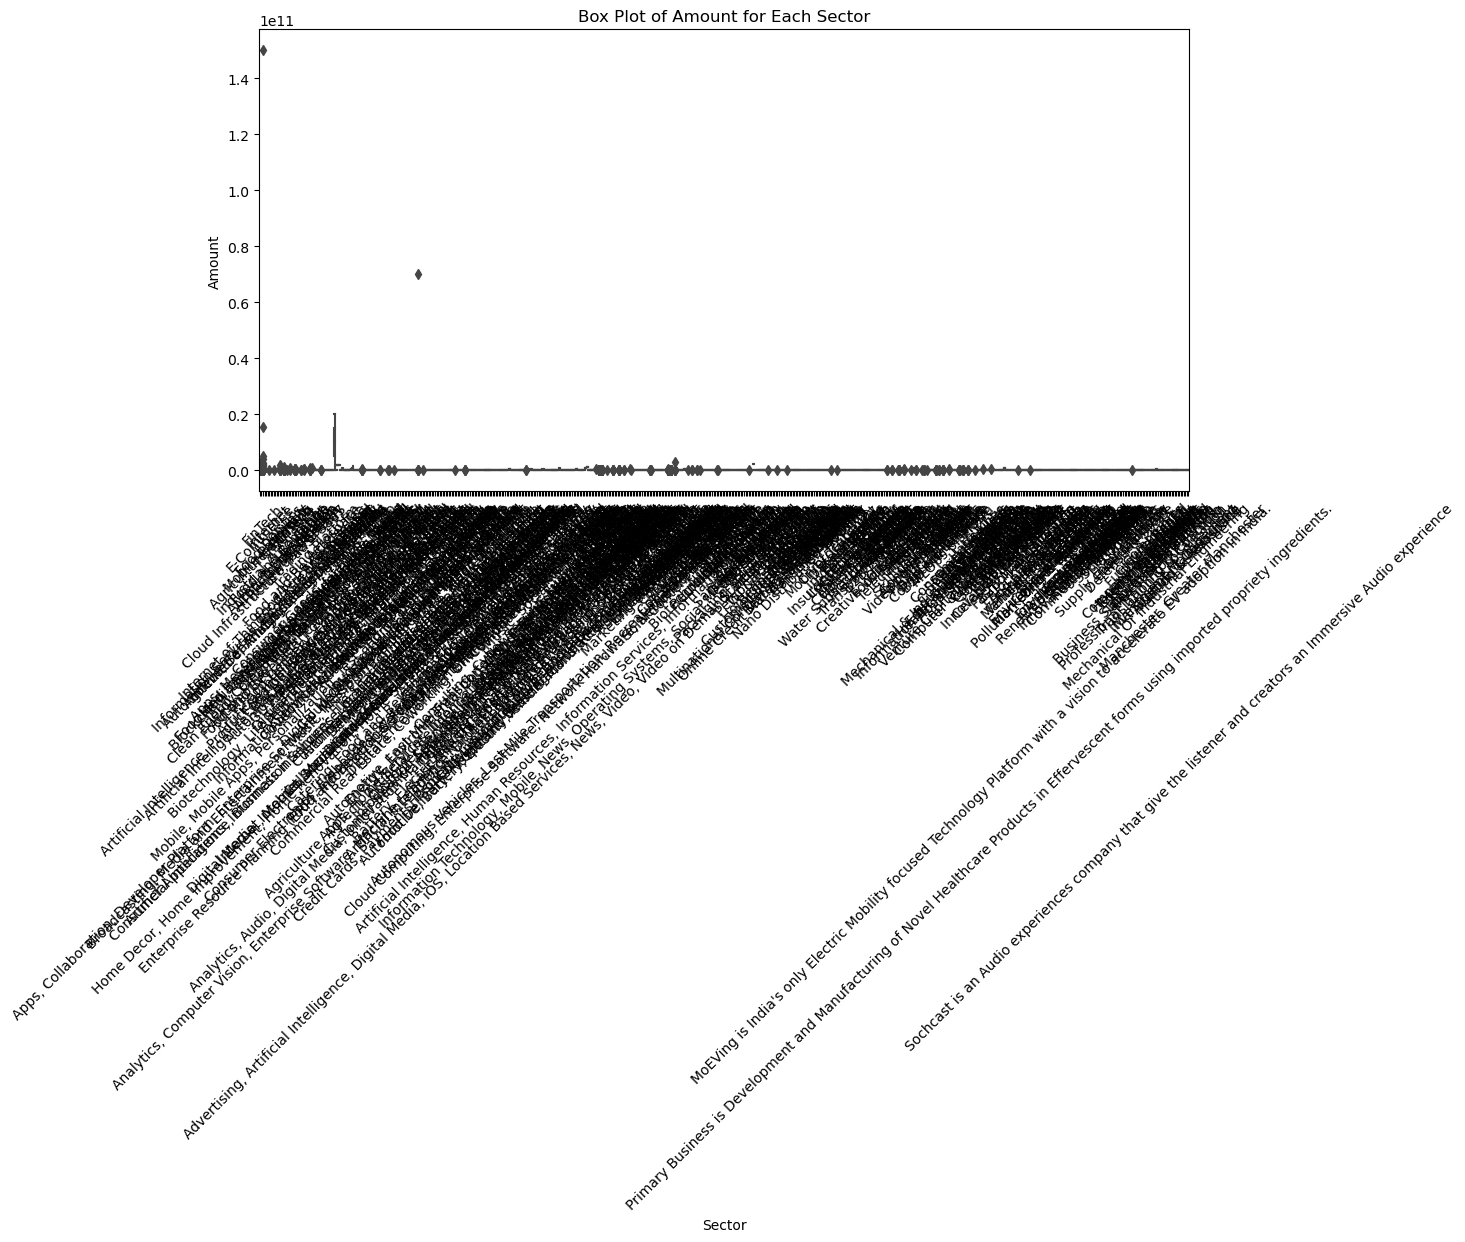

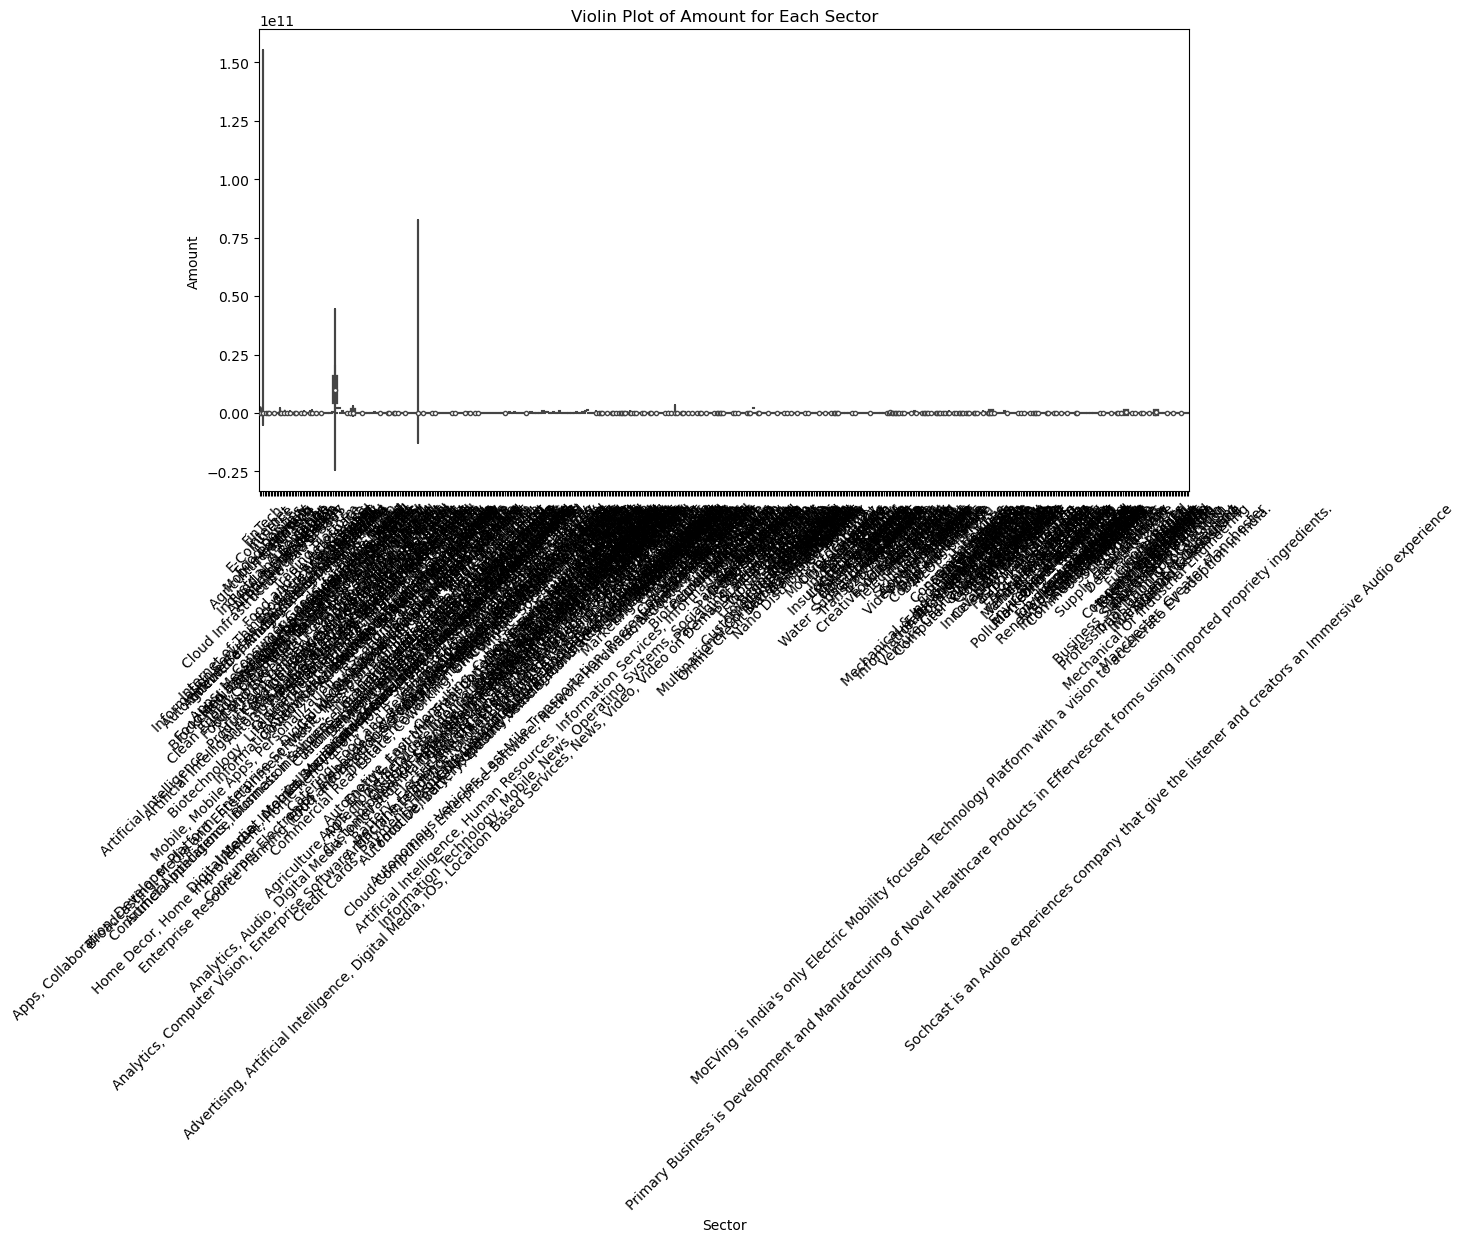

In [20]:
import matplotlib.pyplot as plt
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_data, x='Sector', y='Amount')
plt.title('Box Plot of Amount for Each Sector')
plt.xlabel('Sector')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_data, x='Sector', y='Amount')
plt.title('Violin Plot of Amount for Each Sector')
plt.xlabel('Sector')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

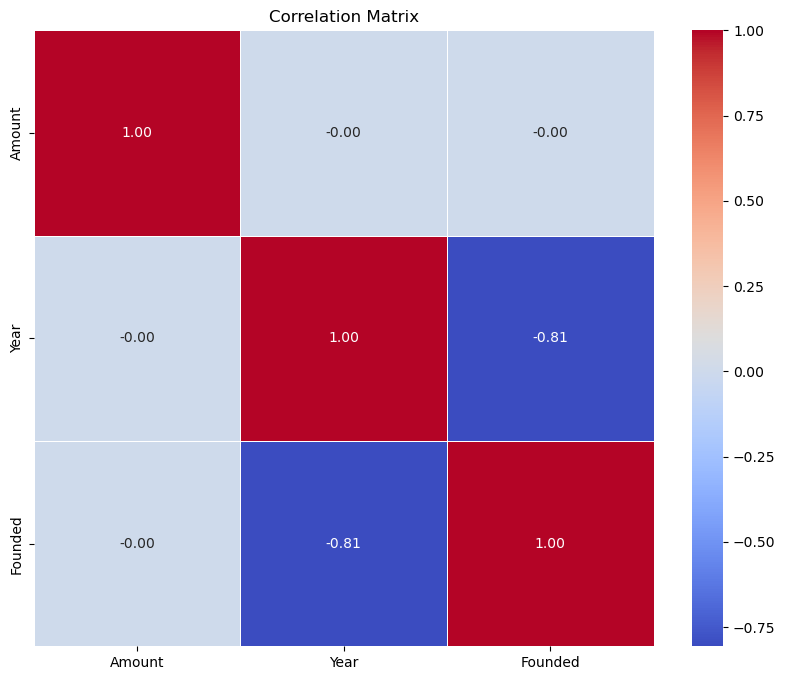

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd

# Calculate mean funding amount for each sector
sector_mean = df_data.groupby('Sector')['Amount'].mean()

# Calculate mean funding amount for each stage
stage_mean = df_data.groupby('Stage')['Amount'].mean()

# Print the mean funding amounts
print("Mean Funding Amount by Sector:")
print(sector_mean)
print("\nMean Funding Amount by Stage:")
print(stage_mean)


Mean Funding Amount by Sector:
Sector
3D Printing, Manufacturing, Product Design    6.000000e+06
AI                                            1.186104e+07
AI & Tech                                     2.000000e+07
AI Chatbot                                    7.500000e+06
AI company                                    4.275000e+06
                                                  ...     
Work Fulfillment                              5.000000e+05
Yoga & wellness                               2.800000e+06
eSports, Gaming, Video Games                  4.000000e+07
other                                         6.987500e+07
sports                                        2.375000e+06
Name: Amount, Length: 611, dtype: float64

Mean Funding Amount by Stage:
Stage
Angel                       8.417415e+06
Bridge                      2.388889e+06
Corporate Round             6.962500e+07
Debt                        3.346387e+09
Debt Financing              1.297231e+08
Early seed                  3

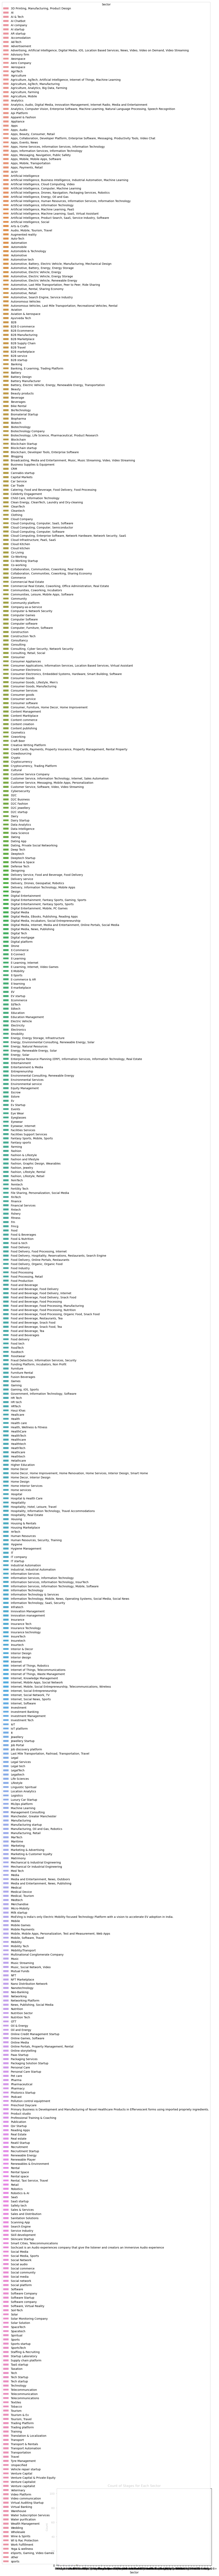

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Sectors' and 'Stage', and calculate the count of each combination
stage_count_by_sector = df_data.groupby(['Sector', 'Stage']).size().reset_index(name='Count')

# Plot the data in a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Stage', y='Count', hue='Sector', data=stage_count_by_sector)
plt.title('Count of Stages for Each Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()


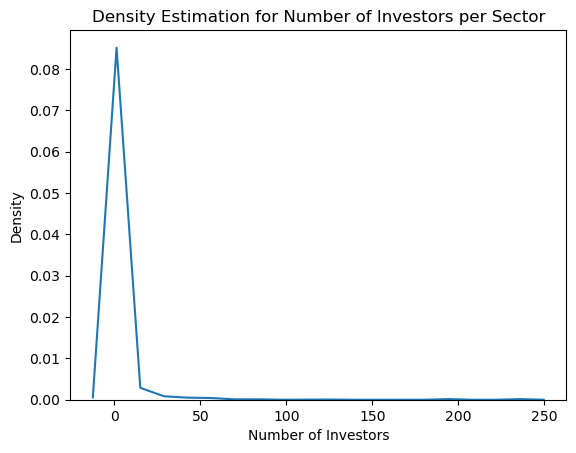

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Sectors' and count the number of unique investors in each sector
investor_count_by_sector = df_data.groupby('Sector')['Investor'].nunique()

# Plot the density estimation
sns.kdeplot(data=investor_count_by_sector, gridsize=20)
plt.title('Density Estimation for Number of Investors per Sector')
plt.xlabel('Number of Investors')
plt.ylabel('Density')
plt.show()


In [28]:
from scipy import stats

data = df_data["Amount"].tolist()
stat, p = stats.shapiro(data)
alpha = 0.05

if p > alpha:
    print("Data appears to be normally distributed.")
else:
    print("Data does not appear to be normally distributed.")


Data does not appear to be normally distributed.


In [30]:
from scipy import stats

data = df_data["Amount"].tolist()
stat, p = stats.kstest(data, 'norm')

alpha = 0.05
if p > alpha:
    print("Data appears to be normally distributed.")
else:
    print("Data does not appear to be normally distributed.")


Data does not appear to be normally distributed.


In [32]:
from scipy import stats

data = df_data["Amount"]
result = stats.anderson(data)

if result.statistic < result.critical_values[2]:
    print("Data appears to be normally distributed.")
else:
    print("Data does not appear to be normally distributed.")


Data does not appear to be normally distributed.


In [37]:
df_data.columns

Index(['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Amount',
       'Stage', 'Year', 'Founded', 'Founders', 'Investor'],
      dtype='object')

In [39]:
df_data.head()

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year,Founded,Founders,Investor
0,TheCollegeFever,"Bangalore, Karnataka, India",E-Commerce,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,Seed,2018,9999,NaN,NaN
1,Happy Cow Dairy,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,40000000.0,Seed,2018,9999,NaN,NaN
2,MyLoanCare,"Gurgaon, Haryana, India",FinTech,Leading Online Loans Marketplace in India,65000000.0,Series A,2018,9999,NaN,NaN
3,PayMe India,"Noida, Uttar Pradesh, India",FinTech,PayMe India is an innovative FinTech organizat...,2000000.0,Angel,2018,9999,NaN,NaN
4,Eunimart,"Hyderabad, Andhra Pradesh, India",E-Commerce,Eunimart is a one stop solution for merchants ...,6000000.0,Seed,2018,9999,NaN,NaN


In [41]:
from scipy import stats

# Assuming df_data is your DataFrame
data_group1 = df_data['Amount']
data_group2 = df_data['Year']
data_group3 = df_data['Founded']

stat, p = stats.levene(data_group1, data_group2, data_group3)

alpha = 0.05
if p > alpha:
    print("The variances are homogeneous.")
else:
    print("The variances are not homogeneous.")


The variances are not homogeneous.


In [44]:
from scipy import stats
import pandas as pd

# Assuming df_data is your DataFrame
data_group1 = df_data['Group1'].dropna().tolist()
data_group2 = df_data['Group2'].dropna().tolist()
data_group3 = df_data['Group3'].dropna().tolist()

# Perform the Fligner-Killeen test
stat, p = stats.fligner(data_group1, data_group2, data_group3)

alpha = 0.05
if p > alpha:
    print("The variances are homogeneous.")
else:
    print("The variances are not homogeneous.")


Test Statistic: 5566.631521057964
p-value: 0.0
The variances are not homogeneous.


Assumptions of the test

Group 1 data:
0      250000.0
1    40000000.0
2    65000000.0
3     2000000.0
4     6000000.0
Name: Amount, dtype: float64

Group 2 data:
0    2018
1    2018
2    2018
3    2018
4    2018
Name: Year, dtype: int64

Group 3 data:
0    9999
1    9999
2    9999
3    9999
4    9999
Name: Founded, dtype: int64

Fligner-Killeen Test:
Test Statistic: 5566.631521057964
p-value: 0.0
The variances are not homogeneous.


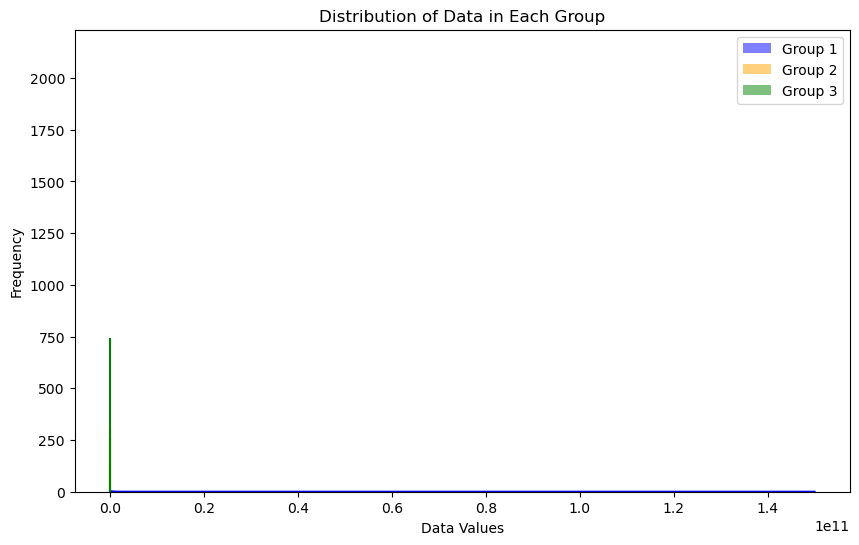

In [45]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_data is your DataFrame
data_group1 = df_data['Amount']
data_group2 = df_data['Year']
data_group3 = df_data['Founded']

# 1. Independence: No code needed here as this is typically ensured through the data collection process.

# 2. Numerical Data:
# Verify that each group contains continuous numerical data
print("Group 1 data:")
print(data_group1.head())
print("\nGroup 2 data:")
print(data_group2.head())
print("\nGroup 3 data:")
print(data_group3.head())

# 3. Homogeneity of Variances: Use the Fligner-Killeen test to check for homogeneity
stat, p = stats.fligner(data_group1, data_group2, data_group3)

alpha = 0.05
print("\nFligner-Killeen Test:")
print("Test Statistic:", stat)
print("p-value:", p)

if p > alpha:
    print("The variances are homogeneous.")
else:
    print("The variances are not homogeneous.")

# 4. Similar Distributions: Visualize the distributions of each group
plt.figure(figsize=(10, 6))
sns.histplot(data_group1, kde=True, label='Group 1', color='blue')
sns.histplot(data_group2, kde=True, label='Group 2', color='orange')
sns.histplot(data_group3, kde=True, label='Group 3', color='green')
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Distribution of Data in Each Group')
plt.legend()
plt.show()


In [46]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_data is your DataFrame
data_group1 = df_data['Sector'].dropna().tolist()
data_group2 = df_data['Stage'].dropna().tolist()
data_group3 = df_data['Company_Brand'].dropna().tolist()

# Perform the Kruskal-Wallis test
stat, p = stats.kruskal(data_group1, data_group2, data_group3)

alpha = 0.05
print("Kruskal-Wallis Test:")
print("Test Statistic:", stat)
print("p-value:", p)

if p > alpha:
    print("The variances are homogeneous (no significant difference).")
else:
    print("The variances are not homogeneous (significant difference).")

# Visualize the distributions of each group (box plot)
data_for_box_plot = [data_group1, data_group2, data_group3]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_for_box_plot)
plt.xlabel('Group')
plt.ylabel('Data Values')
plt.title('Box Plot of Data in Each Group')
plt.show()


Kruskal-Wallis Test:
Test Statistic: 2801.0126974697014
p-value: 0.0
The variances are not homogeneous (significant difference).


ValueError: could not convert string to float: 'E-Commerce'

<Figure size 1000x600 with 0 Axes>

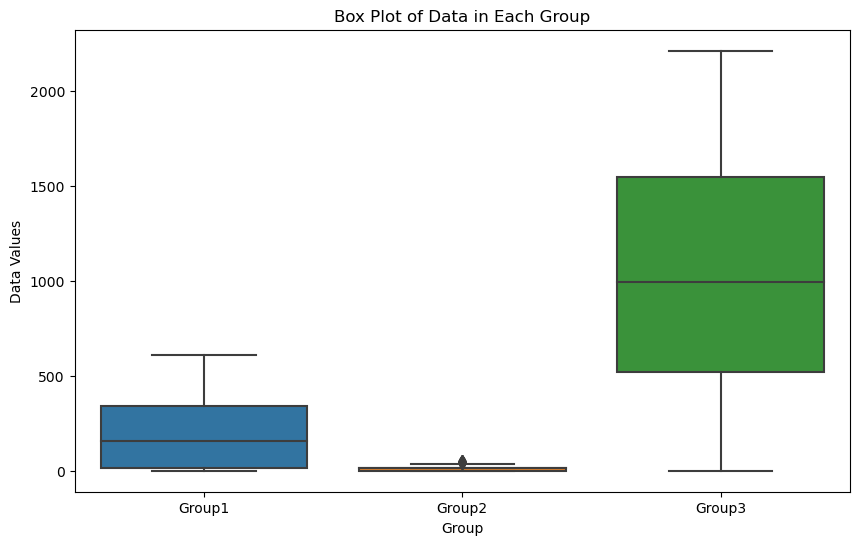

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_data is your DataFrame
data_group1 = df_data['Sector'].dropna()
data_group2 = df_data['Stage'].dropna()
data_group3 = df_data['Company_Brand'].dropna()

# Encode the categorical data to numerical representations
data_group1_encoded, _ = pd.factorize(data_group1)
data_group2_encoded, _ = pd.factorize(data_group2)
data_group3_encoded, _ = pd.factorize(data_group3)

# Create a DataFrame with encoded data
df_encoded = pd.DataFrame({
    'Group1': data_group1_encoded,
    'Group2': data_group2_encoded,
    'Group3': data_group3_encoded
})

# Plot the boxplot using the encoded DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded)
plt.xlabel('Group')
plt.ylabel('Data Values')
plt.title('Box Plot of Data in Each Group')
plt.show()
